In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Simulated dataset
data = {
    'Temperature': np.random.uniform(15, 30, 200),
    'Salinity': np.random.uniform(30, 38, 200),
    'pH_Level': np.random.uniform(7.5, 8.5, 200),
    'Pollution_Level': np.random.uniform(10, 100, 200),
    'Overfishing_Rate': np.random.uniform(0, 80, 200),
    'Marine_Area_Risk': np.random.choice([0, 1], 200)  # Target variable
}

df = pd.DataFrame(data)
print(df.head())


   Temperature   Salinity  pH_Level  Pollution_Level  Overfishing_Rate  \
0    21.408831  35.518972  8.437559        50.385192         71.277637   
1    20.666279  30.279051  8.238411        54.815602         52.054898   
2    20.679099  33.538335  8.178899        56.004947         40.190384   
3    27.322395  30.300807  7.584137        70.993778         16.791620   
4    27.912635  34.233798  8.309475        89.062993         79.798960   

   Marine_Area_Risk  
0                 1  
1                 0  
2                 1  
3                 0  
4                 1  


In [3]:
# Features (X) and target variable (y)
X = df.drop(columns=['Marine_Area_Risk'])
y = df['Marine_Area_Risk']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.55      0.43      0.48        14

    accuracy                           0.68        40
   macro avg       0.63      0.62      0.62        40
weighted avg       0.66      0.68      0.66        40



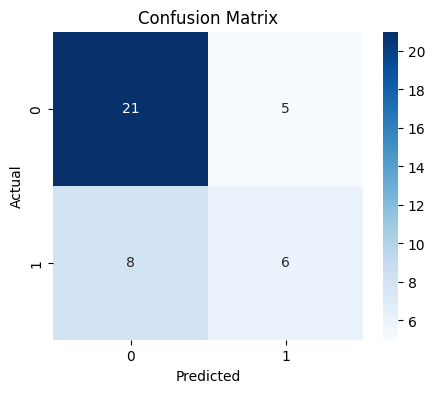

In [5]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
